# Introduction

The database was collected by Elaine Fehrman between March 2011 and March 2012. The study recruited 1885 participants. The snowball sampling methodology recruited a primarily (93.5%) native English-speaking sample, with par- ticipants from the UK (1044; 55.4%), the USA (557; 29.5%), Canada (87; 4.6%), Australia (54; 2.9%), New Zealand (5; 0.3%) and Ireland (n = 20; 1.1%). 

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
from time import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
%matplotlib inline
plt.style.use(['ggplot'])
sns.set()

# First Glance at the Dataset

In [2]:
df_raw = pd.read_excel('data/drug_consumption.xls')

In [3]:
df_raw.shape

(1885, 32)

In [4]:
df_raw.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

| Column name   | Description                                        | Key | Type |
|:--------------|:---------------------------------------------------|:----|:-:|
| ID     | number of record in original database                                 |     | metric |
| Age         | age of participant and has one of the values                 |     |  intervall |
| Gender  |  gender of participant   |  | dichotomous |
| Education  |  level of education of participant |  | ordinal |
| Country | country of current residence of participant | | nominal |
| Ethnicity | ethnicity of participant | | nominal |
| Nscore | NEO-FFI-R Neuroticism |  |
| Escore | NEO-FFI-R Extraversion |  |
| Oscore | NEO-FFI-R Openness to experience |  |
| Ascore | NEO-FFI-R Agreeableness |  |
| Cscore | NEO-FFI-R Conscientiousness |  |
| Impulsive | impulsiveness measured by BIS-11 |  |
| SS | sensation seeing measured by ImpSS |  |
| Alcohol | alcohol consumption | CL0 - CL6 | class |
| Amphet | class of amphetamines consumption | CL0 - CL6 | class |
| Amyl | class of amyl nitrite consumption | CL0 - CL6 | class |
| Benzos | class of benzodiazepine consumption | CL0 - CL6 | class |
| Caff | class of caffeine consumption | CL0 - CL6 | class |
| Cannabis | class of cannabis consumption | CL0 - CL6 | class |
| Choc | class of chocolate consumption | CL0 - CL6 | class |
| Coke | class of cocaine consumption | CL0 - CL6 | class |
| Crack | class of crack consumption | CL0 - CL6 | class |
| Ecstasy | class of ecstasy consumption | CL0 - CL6 | class |
| Heroin | class of heroin consumption | CL0 - CL6 | class |
| Ketamine | class of ketamine consumption | CL0 - CL6 | class |
| Legalh | class of legal highs consumption | CL0 - CL6 | class |
| LSD | class of LSD consumption | CL0 - CL6 | class |
| Meth | class of methadone consumption | CL0 - CL6 | class |
| Shrooms | class of magic mushrooms consumption | CL0 - CL6 | class |
| Nicotine | class of nicotine consumption | CL0 - CL6 | class |
| Semer | class of fictitious drug Semeron consumption | CL0 - CL6 | class |
| VSA | class of volatile substance abuse consumption | CL0 - CL6 | class |

| Key | meaning |
|:----|:--------|
| CL0 | Never Used |
| CL1 | Used over a Decade Ago |
| CL2 | Used in Last Decade |
| CL3 | Used in Last Year |
| CL4 | Used in Last Month |
| CL5 | Used in Last Week |
| CL6 | Used in Last Day |

In [5]:
df_raw.sample(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1861,1865,-0.07854,0.48246,0.45468,-0.57009,0.11440,-0.34799,0.00332,1.24033,-0.15487,0.41594,0.88113,0.40148,CL5,CL6,CL0,CL6,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL0,CL3,CL0,CL4,CL2,CL4,CL0,CL0
594,597,-0.95197,-0.48246,-1.73790,0.96082,-0.31685,-1.43907,0.80523,0.72330,0.94156,0.93949,0.52975,1.22470,CL5,CL2,CL0,CL0,CL5,CL5,CL5,CL3,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
1745,1749,-0.95197,-0.48246,0.45468,-0.57009,-0.31685,1.37297,-0.69509,2.90161,3.46436,-0.78155,0.88113,1.92173,CL5,CL6,CL0,CL6,CL2,CL6,CL6,CL0,CL0,CL3,CL0,CL3,CL2,CL3,CL2,CL3,CL6,CL0,CL1
1240,1244,1.09449,0.48246,0.45468,0.96082,-0.31685,-0.92104,-1.92173,-1.42424,1.45039,0.93949,-1.37983,-0.52593,CL4,CL0,CL0,CL0,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
676,679,-0.95197,-0.48246,-0.61113,0.96082,-0.31685,2.28554,-2.11437,-0.31776,-0.01729,-2.04506,-1.37983,-1.54858,CL0,CL0,CL0,CL0,CL3,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2
1712,1716,1.09449,-0.48246,-0.05921,0.96082,-0.31685,1.23461,0.47617,0.58331,-0.76096,0.93949,-0.71126,-0.21575,CL1,CL0,CL0,CL2,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
174,175,0.49788,0.48246,-0.05921,0.96082,-0.31685,1.02119,-0.57545,-2.21069,0.76096,-1.51840,0.88113,0.07987,CL6,CL0,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
1312,1316,-0.95197,-0.48246,0.45468,-0.28519,-0.31685,-1.86962,1.11406,0.72330,-0.30172,1.30612,-0.21712,0.40148,CL2,CL5,CL2,CL0,CL5,CL5,CL5,CL0,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL3,CL0,CL0
883,887,-0.07854,-0.48246,-0.61113,-0.28519,-0.31685,1.02119,-2.72827,0.14143,-0.01729,-0.14277,0.19268,0.07987,CL4,CL2,CL0,CL5,CL6,CL5,CL5,CL0,CL0,CL2,CL0,CL0,CL5,CL2,CL0,CL4,CL6,CL0,CL0
1236,1240,-0.95197,0.48246,0.45468,0.96082,-0.31685,-0.05188,0.16767,0.44585,-1.34289,0.41594,0.52975,0.76540,CL6,CL0,CL0,CL0,CL5,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


In [6]:
df_raw.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [7]:
df_raw.ID.nunique()

1885

In [8]:
np.sort(df_raw.Alcohol.unique())

array(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], dtype=object)

Columns with drugs have 7 classes. They could transform to an integer value.

In [9]:
df = df_raw.copy()

Create dictionary of quantified country values and their corresponding annotation.

### Feature Explanation

**Education**: The sample recruited was highly educated, with just under two thirds (59.5%) educated to, at a minimum, degree or professional certificate level: 14.4% (271) reported holding a professional certificate or diploma, 25.5% (n = 481) an undergraduate degree, 15% (n = 284) a master’s degree, and 4.7% (n = 89) a doctorate. Approximately 26.8% (n = 506) of the sample had received some college or university tuition although they did not hold any certificates; lastly, 257 (13.6%) had left school at the age of 18 or younger. *Original scale: ordinal*
 
**Country**: The snowball sampling methodology recruited a primarily (93.5%) native English-speaking sample, with participants from the UK (1044; 55.4%), the USA (557; 29.5%), Canada (87; 4.6%), Australia (54; 2.9%), New Zealand (5; 0.3%) and Ireland (n = 20; 1.1%). A total of 118 (6.3%) came from a diversity of other countries. *Original scale: nominal*
 
**Ethnicity**: An overwhelming majority (91.2%; 1720) reported being White, 1.8% (33) stated they were Black, and 1.4% (26) Asian. The remainder of the sample (5.6%; 106) described themselves as ‘Other’ or ‘Mixed’ categories. *Original scale: nominal*
 
Questions out of *NEO-FFI-R*: The statements and indicate on a five-point Likert scale how much a given item applied to them (i.e. 0 = ‘Strongly Disagree’, 1 = ‘Disagree’, 2 = ‘Neutral’, 3 = ‘Agree’, to 4 = ‘Strongly Agree’)
 
**Nscore**: Neuroticism a long-term tendency to experience negative emotions such as nervousness, tension, anxiety and depression. *Scale: 12 - 28*
 
**Escore**: Extraversion manifested in outgoing, warm, active, assertive, talkative, cheerful, and in search of stimulation characteristics. *Scale: 16 - 30*
 
**Oscore**: Openness a general appreciation for art, unusual ideas, and imaginative, creative, unconventional, and wide interests. *Scale 24 - 37*
 
**Ascore**: Agreeableness a dimension of interpersonal relations, characterized by altruism, trust, modesty, kindness, compassion and cooperativeness. *Scale 12 - 33*
 
**Cscore**: Conscientiousness a tendency to be organized and dependable, strong-willed, persistent, reliable, and effi- cient. *Scale 17 - 31*

Questions out of *Barratt Impulsiveness Scale (BIS-11)*: 
 
**Impulsive**: Barratt Impulsiveness Scale (BIS-11). Items are aggregated, and the higher BIS-11 scores, the higher the impulsivity level. The BIS-11 is a 30-item self- report questionnaire, which measures the behavioural construct of impulsiveness, and comprises three subscales: motor impulsiveness, attentional impulsiveness, and non-planning. *Original scale: ordinal* 
 
**SS**: Impulsiveness Sensation-Seeking (ImpSS). *Original scale: ordinal*

**Drugs**: Alcohol, Amphet (amphetamines), Amyl (amyl nitrite), Benzos (benzodiazepines), Caff (caffeine), Cannabis, Choc (chocolate), Coke, Crack, Ecstasy, Heroin, Ketamine, Legalh (legal highs), LSD, Meth (methadone), Shrooms (mushrooms), Nicotine, Semer, VSA
 
*Drug Scale*: CL0 - Never Used, CL1 - Used over a Decade Ago, CL2 - Used in Last Decade, CL3 - Used in Last Year, CL4 - Used in Last Month, CL5 - Used in Last Week, CL6 - Used in Last Day

# Data Preprocessing

### Country & Ethnicity

Here, we create a dictionary with the original values and the corresponding annotations of the countries/ethnicities. 

In [10]:
data = {'country': ['UK', 'CAN', 'USA', 'OTHER', 'AUS', 'IRE', 'NZ'], 
        'Country': list(df.Country.unique())}
df_ctr = pd.DataFrame(data)

In [11]:
# Add readable Country to DataFrame
df = pd.merge(df, df_ctr, left_on='Country', right_on='Country')

In [12]:
data = {'Ethnicity': list(df.Ethnicity.unique()), 
        'eth_val': ['mix_wh_as', 'white', 'other', 'mix_wh_bl', 'asian', 'black', 'mix_bl_as']}
df_eth = pd.DataFrame(data)

In [13]:
# Add readable Country to DataFrame
df = pd.merge(df, df_eth, left_on='Ethnicity', right_on='Ethnicity')

### Gender

We use dummies to transform the original numerical values of gender into 0 (male) and 1 (female).  

In [14]:
dict_gender = {0.48246 : 1, -0.48246 : 0} 

df['Gender'] = df['Gender'].map(dict_gender) 
set(df['Gender'])

{0, 1}

### Drugs

Because all drug values have an 'CL' before the actual scaling, we slice out the 'CL' and merely leave the scale number in the dataframe. 

In [15]:
drugs = list(df_raw.select_dtypes(include='object').columns)
for d in drugs:
    df[d] = df[d].apply(lambda x: int(x[-1]))

In [16]:
drugs

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Shrooms',
 'Nicotine',
 'Semer',
 'VSA']

### Education

In [17]:
dict_edu = {-2.43591 : 0, -1.73790 : 1, -1.43719 : 2, -1.22751 : 3, -0.61113 : 4, 
        -0.05921 : 5, 0.45468 : 6, 1.16365 : 7, 1.98437 : 8} 

df['Education'] = df['Education'].map(dict_edu) 
set(df['Education'])

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [18]:
df.head(3)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,country,eth_val
0,1,0.49788,1,5,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0,UK,mix_wh_as
1,135,-0.07854,1,7,0.96082,0.126,3.27393,-1.50796,-0.31776,0.59042,-0.65253,-1.37983,0.40148,6,1,0,0,6,1,6,2,0,0,0,0,0,0,0,0,2,0,1,UK,mix_wh_as
2,192,-0.95197,0,6,0.96082,0.126,-0.34799,1.28610,-1.11902,0.59042,-0.52745,0.52975,0.07987,5,0,0,0,6,2,5,0,0,0,0,0,0,0,0,0,2,0,0,UK,mix_wh_as


### Age

In [19]:
dict_age = {-0.95197 : 0, -0.07854 : 1, 0.49788 : 2, 1.09449 : 3, 1.82213 : 4, 
        2.59171 : 5} 

df['Age'] = df['Age'].map(dict_age) 
set(df['Age'])

{0, 1, 2, 3, 4, 5}

### Drop ID

In [20]:
df.drop(columns='ID', inplace=True)

### Rename features associated to the NEO-FFI-R and the Barratt Impulsiveness Scale

In [21]:
df.rename(columns={'Ascore':'Agreeableness', 'Cscore':'Conscientiousness', 
                   'Escore':'Extraversion', 'Nscore':'Neuroticism', 
                   'Oscore':'Openness', 'SS':'Sensation-Seeking'}, inplace=True)

# Data Exploration

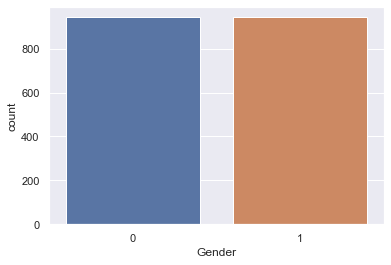

In [22]:
sns.countplot(df.Gender);

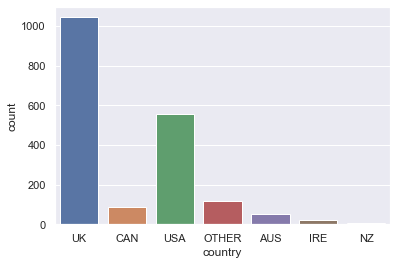

In [23]:
sns.countplot(df['country']);

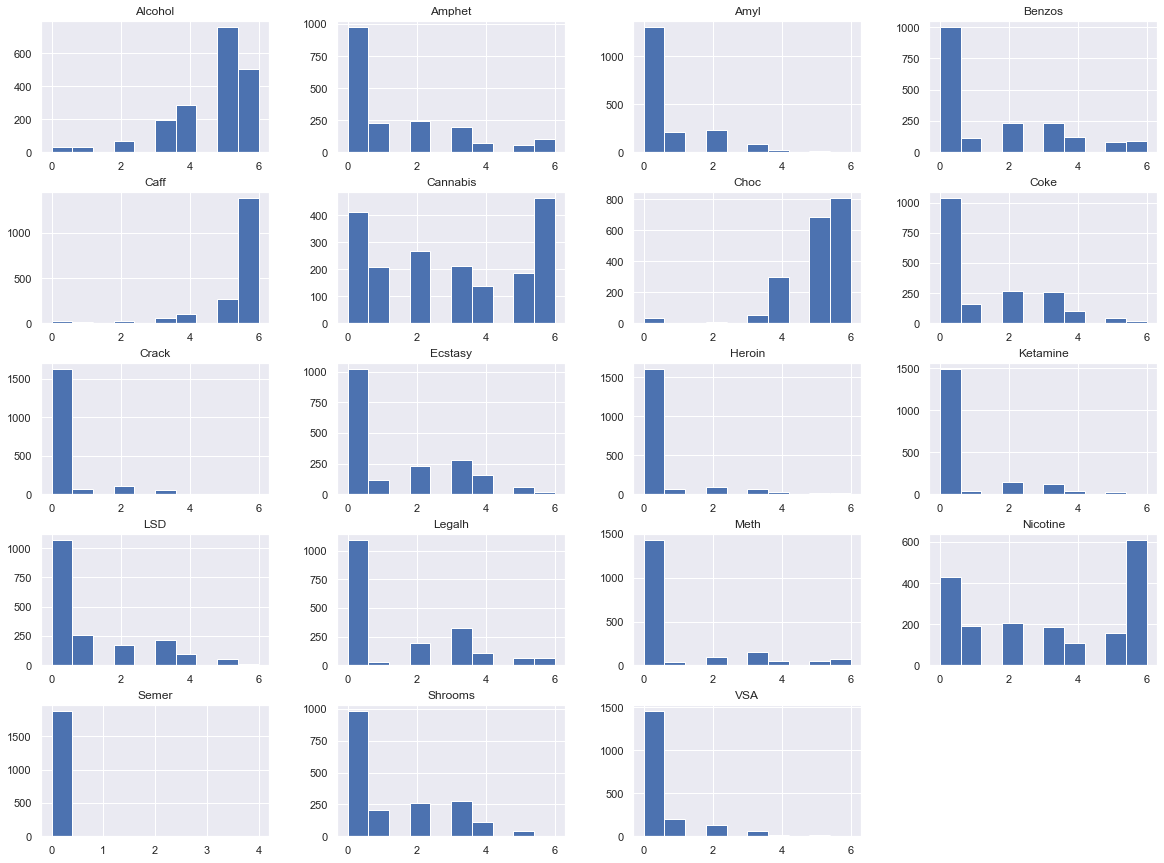

In [24]:
df[drugs].hist(figsize=(20, 15));

*Histogram of features based on the NEO-FFI-R and the Barratt Impulsiveness Scale*

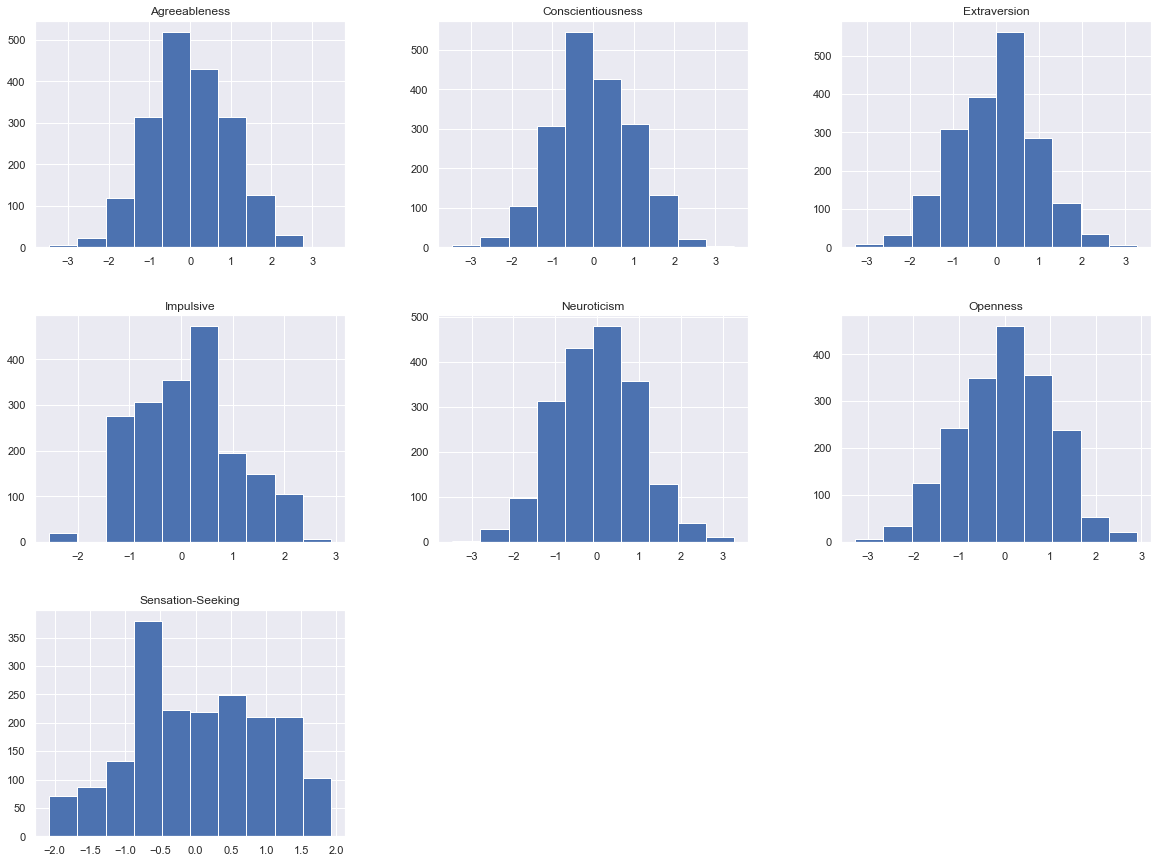

In [25]:
scores = ['Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsive', 'Sensation-Seeking']
df[scores].hist(figsize=(20, 15));

As we can see, the features associated to the NEO-FFI-R and the Barratt Impulsiveness Scale are normally distributed and scaled between -3 and +3. 

*Histogram of demographic data that is numerical*

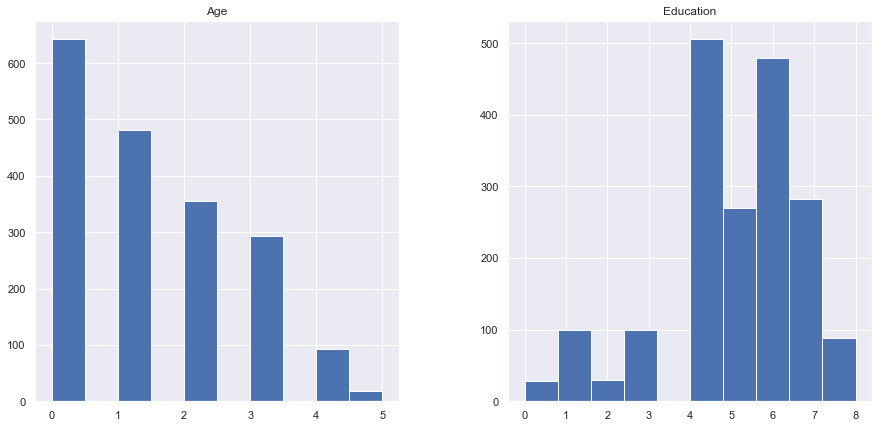

In [26]:
demographic = ['Age', 'Education']
df[demographic].hist(figsize=(15, 7));

*Seaborn frequency plots of demographic data that is categorical*

### Binary classification of the label 'drug use'

The categories ‘Used in last decade’ (CL2), ‘Used over a decade ago’(CL1) and ‘Never used’ (CL0) are merged to form a group of non-users (0) and all other categories are placed into the group of users (1). This classification problem is called ‘year-based’. This classification problem is called *‘year-based’* (Elaine Fehrman et al., 2017). Here, we first replace all 0, 1, and 2 in the drug columns into 'non-users' and the remaining counts in 'user'. 

In [27]:
#replace all values with the corresponding category 

dict = {0 : 0, 1 : 0, 2 : 0, 3 : 1, 4 : 1, 5 : 1, 6 : 1} 

for d in drugs:
    df[d] = df[d].map(dict) 

In [72]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsive,Sensation-Seeking,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,country,eth_val
0,2,1,5,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as
1,1,1,7,0.96082,0.126,3.27393,-1.50796,-0.31776,0.59042,-0.65253,-1.37983,0.40148,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as
2,0,0,6,0.96082,0.126,-0.34799,1.28610,-1.11902,0.59042,-0.52745,0.52975,0.07987,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as
3,2,1,6,0.96082,0.126,-1.05308,0.80523,-0.71727,1.28610,0.93949,-0.21712,-0.84637,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as
4,4,1,6,0.96082,0.126,-0.24649,0.96248,0.14143,-0.15487,0.41594,-1.37983,-2.07848,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as


### Frequencyplot of each drug group

In [28]:
# Future work

## Heatmap

After looking at a heatmap of all features, we deleted the ones with no correlation for a better view.

In [29]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism',
       'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness',
       'Impulsive', 'Sensation-Seeking', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
       'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Nicotine', 'Semer',
       'VSA', 'country', 'eth_val'],
      dtype='object')

(0.0, 26.0)

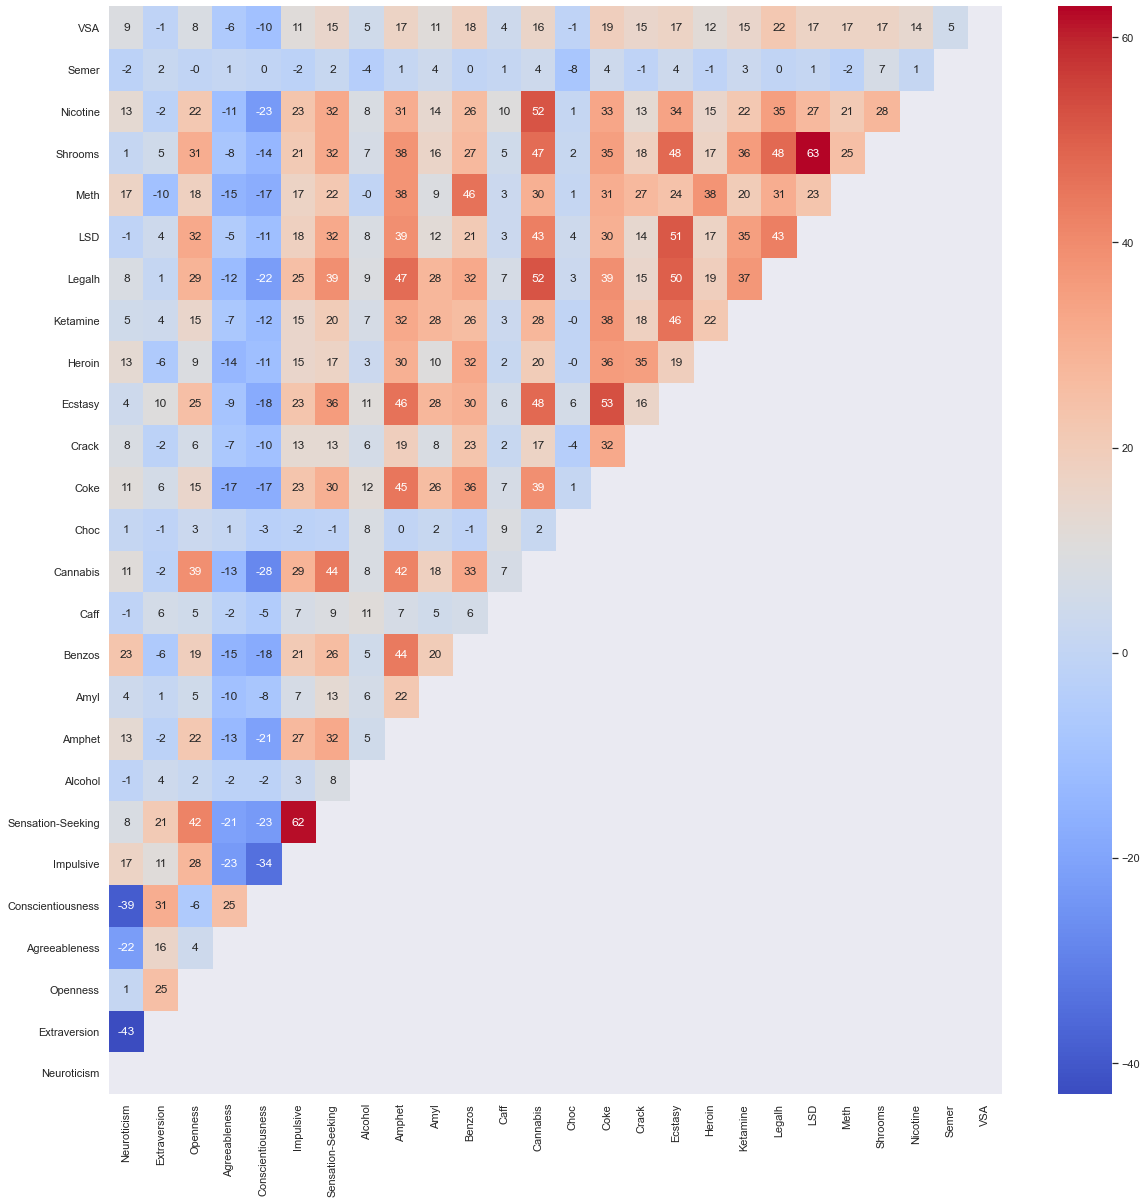

In [30]:
cont_var = ['Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 
            'Conscientiousness', 'Impulsive', 'Sensation-Seeking']
cat_var=['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Shrooms', 'Nicotine', 'Semer', 'VSA']
#cont_var

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
X_dum = pd.get_dummies(df[cont_var+cat_var].copy(), drop_first=True)
#X_dum.head()
mask = np.triu(X_dum.corr())
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,26))
#plt.savefig(‘figures/correlogram.png’)

# Prediction of Cannabis Use based on Personality Traits

In [31]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsive,Sensation-Seeking,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,country,eth_val
0,2,1,5,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as
1,1,1,7,0.96082,0.126,3.27393,-1.50796,-0.31776,0.59042,-0.65253,-1.37983,0.40148,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as
2,0,0,6,0.96082,0.126,-0.34799,1.28610,-1.11902,0.59042,-0.52745,0.52975,0.07987,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as
3,2,1,6,0.96082,0.126,-1.05308,0.80523,-0.71727,1.28610,0.93949,-0.21712,-0.84637,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as
4,4,1,6,0.96082,0.126,-0.24649,0.96248,0.14143,-0.15487,0.41594,-1.37983,-2.07848,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,UK,mix_wh_as


In [32]:
features = ['Age', 'Gender', 'Education', 'Neuroticism', 'Extraversion', 'Openness',
            'Agreeableness', 'Conscientiousness', 'Impulsive', 'Sensation-Seeking']
label = ['Cannabis']

In [33]:
X = df[features]
y = df[label]

### Shuffle and Split Data

We will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [34]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1319 samples.
Testing set has 566 samples.


## Model 1: KNN 

In [35]:
#from sklearn.metrics import confusion_matrix
#from sklearn.neighbors import KNeighborsClassifier

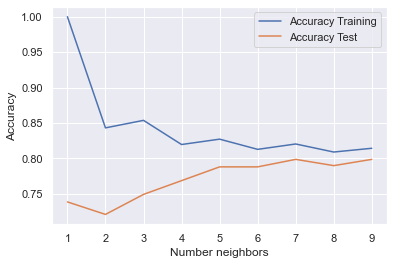

In [36]:
train_accuracy = []
test_accuracy = []

# Probiere Werte für k von 1 bis 10 aus
neighbor_settings = range(1, 10)

for k in neighbor_settings:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbor_settings, train_accuracy, label='Accuracy Training')
plt.plot(neighbor_settings, test_accuracy, label='Accuracy Test')
plt.ylabel('Accuracy')
plt.xlabel('Number neighbors')
plt.legend();

### Confusion Matrix

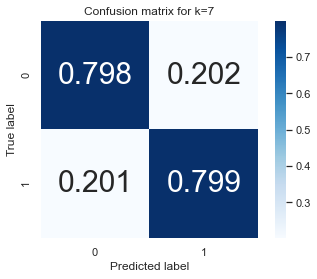

In [50]:
clf_7 = KNeighborsClassifier(n_neighbors=7)
clf_7.fit(X_train, y_train)
#train_accuracy.append(clf.score(X_train, y_train))
#test_accuracy.append(clf.score(X_test, y_test))

cm = confusion_matrix(y_test, clf_7.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for k=7'.format());

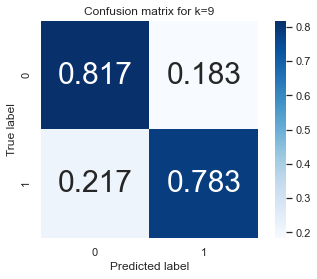

In [51]:
clf_9 = KNeighborsClassifier(n_neighbors=9)
clf_9.fit(X_train, y_train)
#train_accuracy.append(clf.score(X_train, y_train))
#test_accuracy.append(clf.score(X_test, y_test))

cm = confusion_matrix(y_test, clf_9.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for k=9'.format());

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_9.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       257
           1       0.84      0.78      0.81       309

    accuracy                           0.80       566
   macro avg       0.80      0.80      0.80       566
weighted avg       0.80      0.80      0.80       566



In [37]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
#from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

## Comparing different models

Let's train and test the models on training sets of different sizes to see how it affects their runtime and predictive performance (both on the test, and training sets).

In [59]:
# TODO: Import the three supervised learning models from sklearn
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
#from time import time

# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = LogisticRegression(random_state=101)
clf_B = RandomForestClassifier(random_state = 101)
clf_C = SVC(random_state = 101)
clf_D = KNeighborsClassifier(n_neighbors=7)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

LogisticRegression trained on 13 samples.
LogisticRegression trained on 132 samples.
LogisticRegression trained on 1319 samples.
RandomForestClassifier trained on 13 samples.
RandomForestClassifier trained on 132 samples.
RandomForestClassifier trained on 1319 samples.
SVC trained on 13 samples.
SVC trained on 132 samples.
SVC trained on 1319 samples.
KNeighborsClassifier trained on 13 samples.
KNeighborsClassifier trained on 132 samples.
KNeighborsClassifier trained on 1319 samples.


In [60]:
for x in [clf_A, clf_B, clf_C, clf_D]:
    print('Classification Report for {}'.format(x))
    print(classification_report(y_test, x.predict(X_test)))
    print('\n\n')

Classification Report for LogisticRegression(random_state=101)
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       257
           1       0.82      0.78      0.80       309

    accuracy                           0.79       566
   macro avg       0.78      0.79      0.79       566
weighted avg       0.79      0.79      0.79       566




Classification Report for RandomForestClassifier(random_state=101)
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       257
           1       0.84      0.79      0.81       309

    accuracy                           0.80       566
   macro avg       0.80      0.81      0.80       566
weighted avg       0.81      0.80      0.80       566




Classification Report for SVC(random_state=101)
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       257
           1       0.83      0.78      0.80       309

In [39]:
#results

In [40]:
#Printing out the values
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

LogisticRegression


,1%,10%,100%
acc_test,0.699647,0.757951,0.786219
acc_train,0.676667,0.823333,0.773333
f_test,0.708491,0.786249,0.810449
f_train,0.691658,0.836386,0.791411
pred_time,0.002888,0.003623,0.002575
train_time,0.009535,0.139964,0.013641


RandomForestClassifier


,1%,10%,100%
acc_test,0.683746,0.779152,0.803887
acc_train,0.646667,0.850000,1.000000
f_test,0.691037,0.799087,0.831622
f_train,0.664100,0.870394,1.000000
pred_time,0.024990,0.027666,0.029890
train_time,0.082210,0.093395,0.171833


SVC


,1%,10%,100%
acc_test,0.545936,0.765018,0.793286
acc_train,0.546667,0.806667,0.800000
f_test,0.600466,0.791246,0.821355
f_train,0.599706,0.822086,0.819775
pred_time,0.003250,0.005150,0.014304
train_time,0.002344,0.002727,0.031372


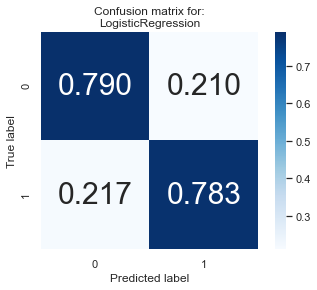

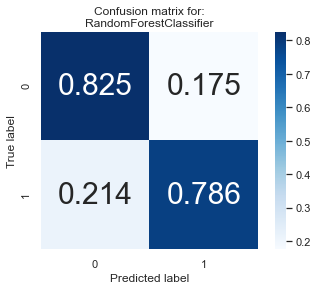

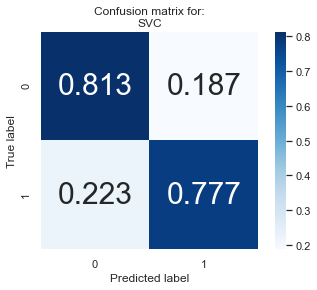

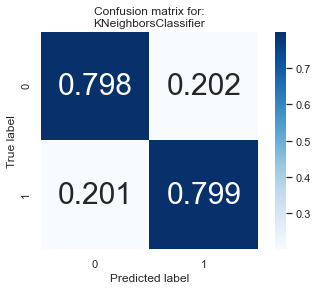

In [61]:
#Visualizing the confusion matrix for each classifier
#from sklearn.metrics import confusion_matrix

for i,model in enumerate([clf_A,clf_B,clf_C, clf_D]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

## Modeltuning mit GridSearch

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.pipeline import Pipeline

In [95]:
my_scorer = make_scorer(f1_score, average='weighted')

### KNN

In [97]:
param_grid = {'n_neighbors' : list(range(1,50)),
             'weights': ['uniform', 'distance'],
             'leaf_size' : list(range(1,50))}
             #'metrics': ['euclidean','manhattan']}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, 
                        cv=3 , verbose=True, n_jobs=-1,
                       scoring=my_scorer)
best_knn = grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 4802 candidates, totalling 14406 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 3872 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 6072 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 8672 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 11672 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 14406 out of 14406 | elapsed:  1.6min finished


In [98]:
print(best_knn.best_score_)
print(best_knn.best_params_)
print(best_knn.best_estimator_)

0.7863354574424598
{'leaf_size': 1, 'n_neighbors': 49, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=1, n_neighbors=49, weights='distance')



|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: |
| Accuracy Score |        0.8000     |      0.7739     |
| F-score        |        0.0000     |      0.0000     |

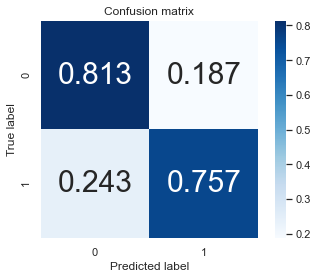

In [75]:
y_pred = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix'.format());

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       257
           1       0.83      0.76      0.79       309

    accuracy                           0.78       566
   macro avg       0.78      0.79      0.78       566
weighted avg       0.79      0.78      0.78       566



In [ ]:
accuracy_score(y_test, y_pred)

### Random Forest

In [84]:
param_grid = {'n_estimators' : list(range(1,30)),
             'max_depth': [5, 8, 15, 25, 30],
             #'min_samples_leaf' : list(range(1,50)),
             'max_features' : ['auto', 'sqrt'],
             'min_samples_split' : [2, 5, 10]}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, 
                        cv=3 , verbose=True, n_jobs=-1,
                       scoring='recall')
best_rf = grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 870 candidates, totalling 2610 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 2610 out of 2610 | elapsed:   25.0s finished


In [86]:
print(best_rf.best_score_)
print(best_rf.best_params_)
print(best_rf.best_estimator_)

0.818840579710145
{'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 28}
RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=28)
recall



|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: |
| Accuracy Score |        0.8039     |      0.8188     |
| F-score        |        0.0000     |      0.0000     |

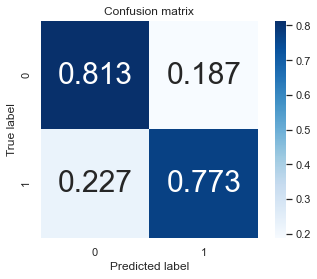

In [87]:
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix'.format());

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       257
           1       0.83      0.77      0.80       309

    accuracy                           0.79       566
   macro avg       0.79      0.79      0.79       566
weighted avg       0.79      0.79      0.79       566



In [89]:
accuracy_score(y_test, y_pred)

0.7915194346289752

### SVC

In [91]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['linear', 'rbf', 'poly'],
             'degree': [0, 1, 2, 3, 4, 5, 6]}

grid_svc = GridSearchCV(SVC(), param_grid=param_grid, 
                        cv=3 , verbose=True, n_jobs=-1,
                       scoring='f1_score')
best_svc = grid_svc.fit(X_train, y_train)

Fitting 3 folds for each of 525 candidates, totalling 1575 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1016 tasks      | elapsed:  5.0min


KeyboardInterrupt: 

In [ ]:
print(best_svc.best_score_)
print(best_svc.best_params_)
print(best_svc.best_estimator_)

In [ ]:
y_pred = best_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# view with a heatmap
plt.figure(i)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix'.format());

In [ ]:
accuracy_score(y_test, y_pred)

# Testcells

In [43]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20)},
    #'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))},
    {'classifier': [SVC()],
     'classifier__C': [1, 5, 10, 50],
     'classifier__gamma': [0.0001, 0.0005, 0.001, 0.005]
    }
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)
# Fit on data
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 116 candidates, totalling 348 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 348 out of 348 | elapsed:    6.7s finished


In [44]:
best_clf.best_estimator_ 

Pipeline(steps=[('classifier', SVC(C=50, gamma=0.005))])

In [45]:
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test) 
               
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 116 candidates, totalling 348 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s


Unoptimized model
------
Accuracy score on testing data: 0.7933
F-score on testing data: 0.8246

Optimized Model
------
Final accuracy score on the testing data: 0.7933
Final F-score on the testing data: 0.8246
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1....
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [6, 11, 16, 21, 26, 31],
      

[Parallel(n_jobs=-1)]: Done 333 out of 348 | elapsed:    3.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 348 out of 348 | elapsed:    3.7s finished


In [46]:
# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5) 

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scorer) 

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train) 

# Get the estimator
best_clf = grid_fit.best_estimator_ 

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test) 

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

NameError: name 'parameters' is not defined

In [48]:
from sklearn.preprocessing import MinMaxScaler

pipe = Pipeline([('scaler', MinMaxScaler()),('svm', SVC())])
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.7884923378269386
0.7915194346289752
{'svm__C': 1}


Copy and Paste:

In [ ]:
# TODO: Initialize the classifier
#clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier()) 

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[50, 120],                
              'learning_rate':[0.1, 0.5, 1.],               
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),               
              'base_estimator__max_depth' : np.arange(1, 4, 1)              
             } 
parameters = {'classifier__penalty' : ['l1', 'l2'],
             'classifier__C' : np.logspace(-4, 4, 20)}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5) 

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scorer) 

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train) 

# Get the estimator
best_clf = grid_fit.best_estimator_ 

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test) 

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)